In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict
import joblib

In [2]:
df=pd.read_csv('census.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.dtypes  

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
target            object
dtype: object

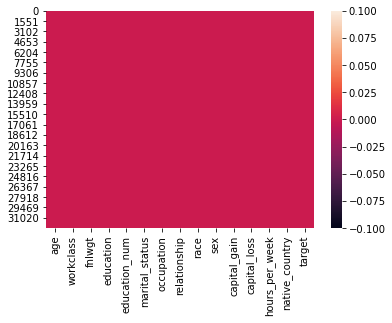

In [7]:
sns.heatmap(df.isnull())#there are no missing values in the dataset

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA by sweetviz library

In [11]:
import sweetviz

In [12]:
#Replacing instead of label encoding because we want >50K=1 & No:<=50K
df['target']=df['target'].replace([' >50K',' <=50K'],[1,0])

#converted as sweetviz is giving error with sign like <>=


In [27]:
my_report=sweetviz.analyze([df,'df'],target_feat='target')


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |█▎                   | [  6%]   00:00  -> (00:01 left)
:TARGET::                          |█▎                   | [  6%]   00:00  -> (00:01 left)
:TARGET::                          |██▋                  | [ 12%]   00:00  -> (00:02 left)
:age:                              |██▋                  | [ 12%]   00:00  -> (00:02 left)
:age:                              |███▉                 | [ 19%]   00:01  -> (00:05 left)
:workclass:                        |███▉                 | [ 19%]   00:01  -> (00:05 left)
:workclass:                        |█████▎               | [ 25%]   00:02  -> (00:06 left)
:fnlwgt:                           |█████▎               | [ 25%]   00:02  -> (00:06 left)
:fnlwgt:                           |██████▌              | [ 31%]   00:03  -> (00:06 left

Creating Associations graph... DONE!


In [28]:
my_report.show_html('censusriv-1.html')

Report censusriv-1.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# EDA

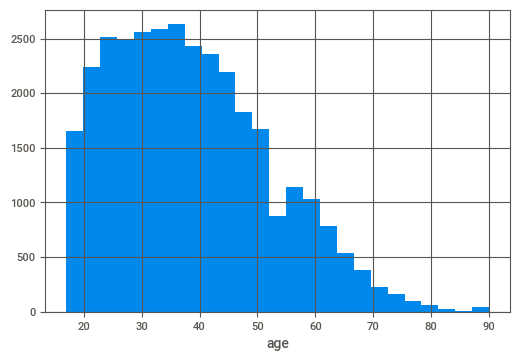

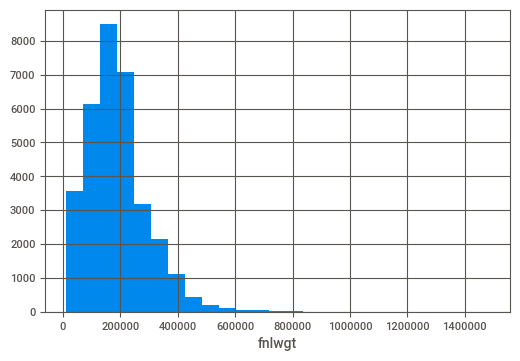

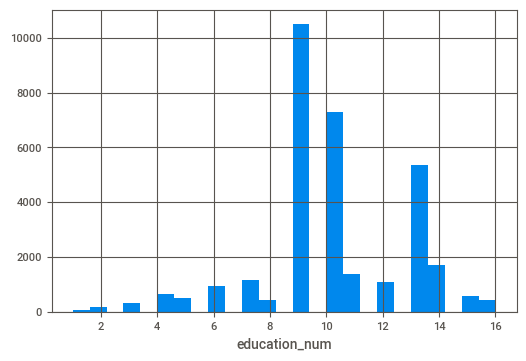

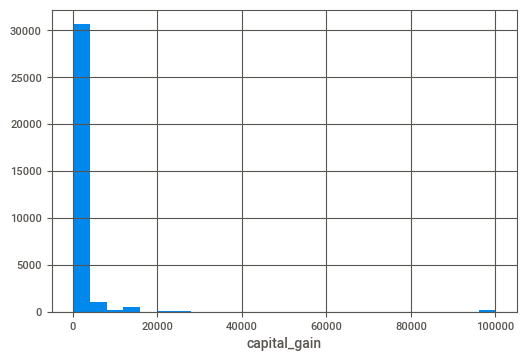

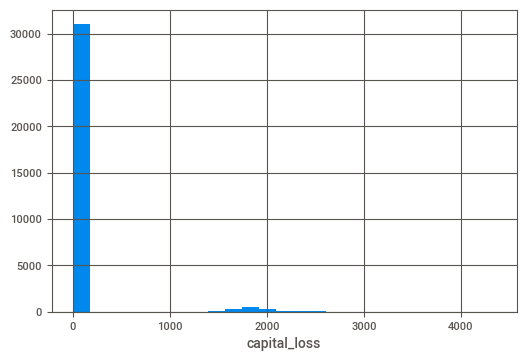

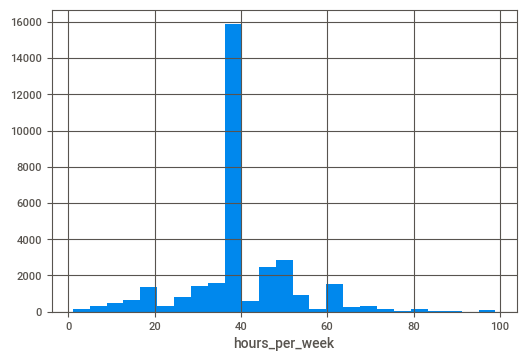

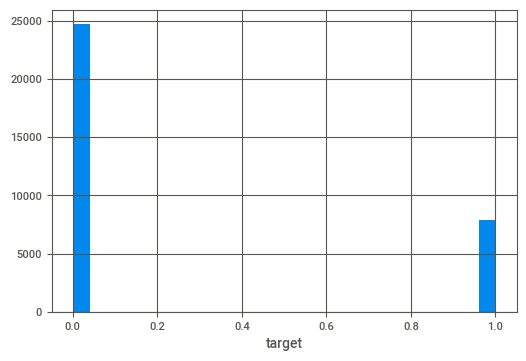

In [29]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [30]:
#checking relation of each attribute w.r.t target attribute

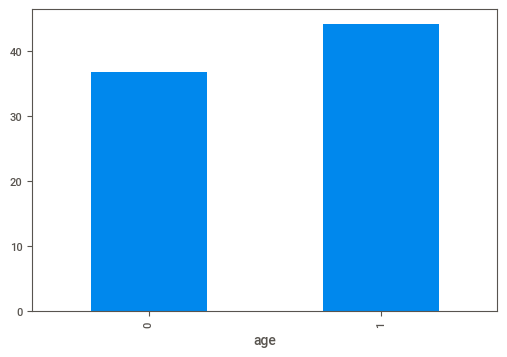

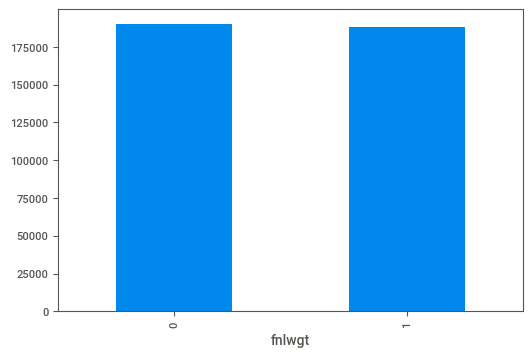

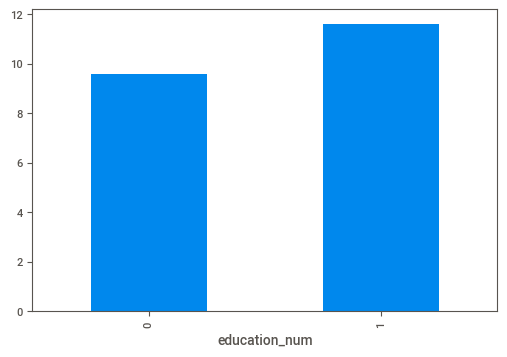

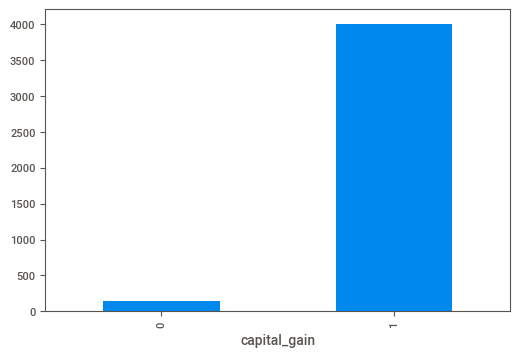

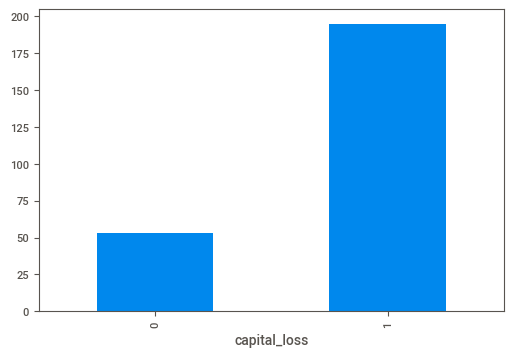

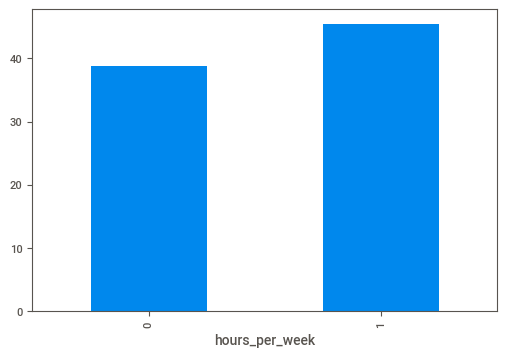

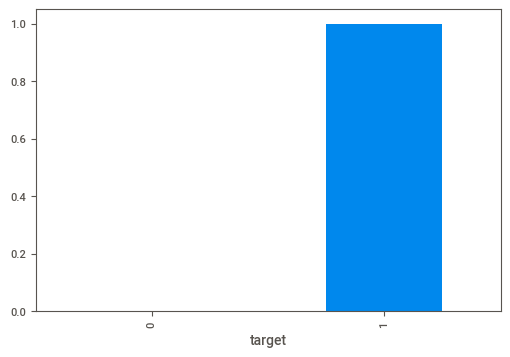

In [31]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df.groupby('target')[feature].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()


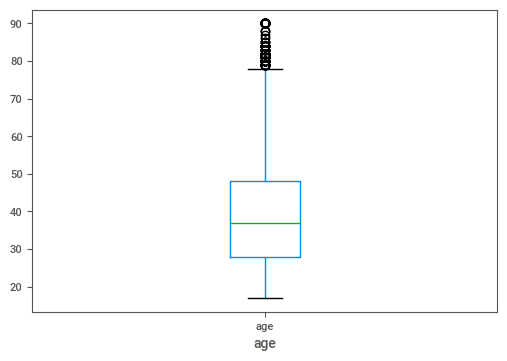

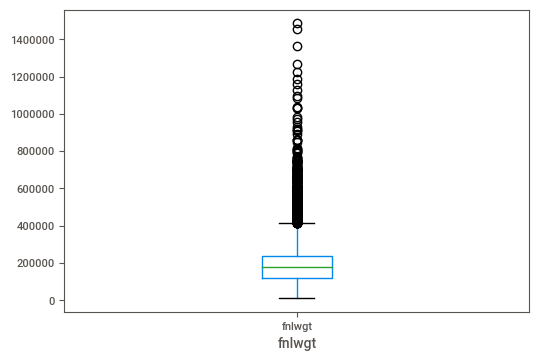

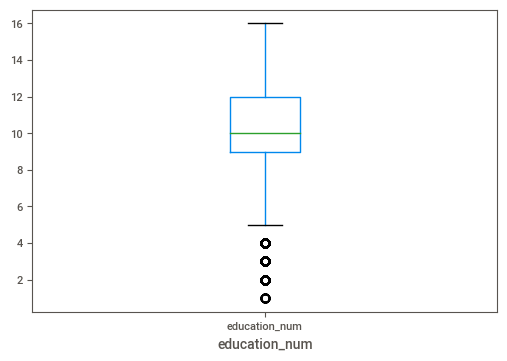

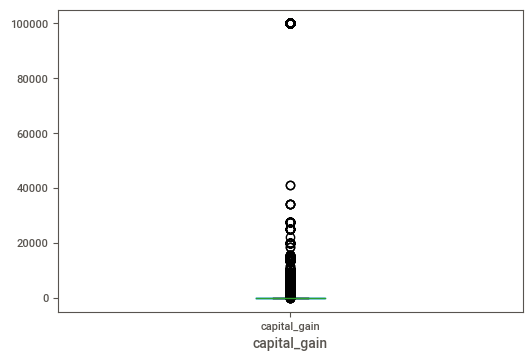

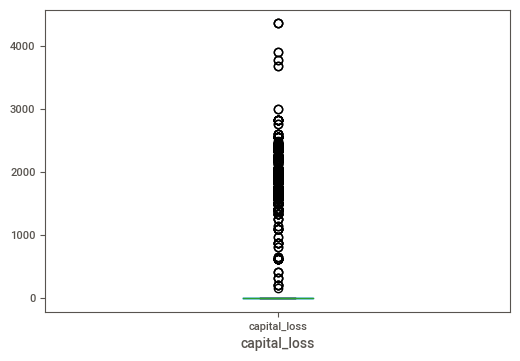

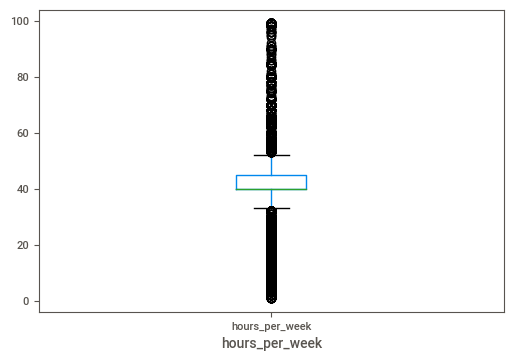

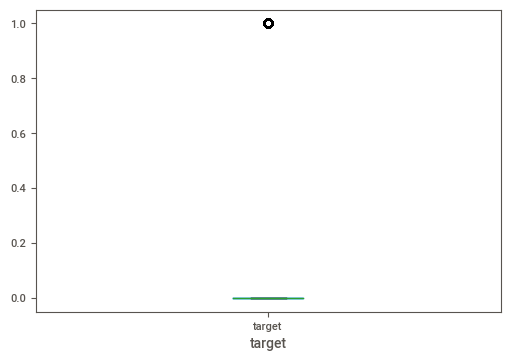

In [32]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

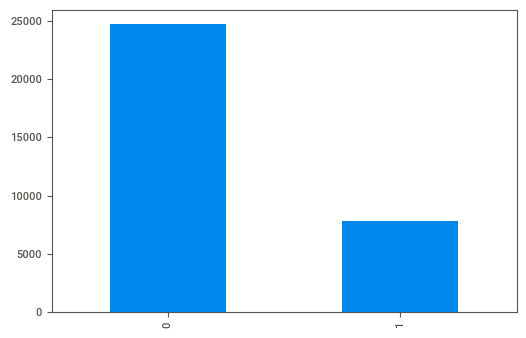

In [33]:
#Imbalanced dataset,need to be treated with upsampling techniques.
df['target'].value_counts().plot.bar()

# Feature Engineering

In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [14]:
df['target'].value_counts()

0    24719
1     7841
Name: target, dtype: int64

# Separating target and independent variables

In [15]:
y=df['target']
x=df.drop(['target'],axis=1)

# Oversampling technique

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [17]:
x_ovrsampled,y_oversampled=ros.fit_sample(x,y)

In [18]:
x.shape,x_ovrsampled.shape

((32560, 14), (49438, 14))

In [19]:
y.shape,y_oversampled.shape

((32560,), (49438,))

In [20]:
x_ovrsampled.shape[0]-x.shape[0] #Exta rows added due to oversampling technique.

16878

In [21]:
y_oversampled.value_counts()

1    24719
0    24719
Name: target, dtype: int64

# Making dummies

In [22]:
categorical_features=[feature for feature in x_ovrsampled.columns if x_ovrsampled[feature].dtypes=='object']
for feature in categorical_features:
    if x_ovrsampled[feature].nunique()>=2:
        print(feature,x_ovrsampled[feature].nunique())

workclass 9
education 16
marital_status 7
occupation 15
relationship 6
race 5
sex 2
native_country 42


In [23]:
x_ovrsampled.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [24]:
x_ovrsampled.shape

(49438, 14)

In [25]:
x_ovrsampled=pd.get_dummies(x_ovrsampled)

In [26]:
x_ovrsampled.shape

(49438, 108)

In [27]:
x_ovrsampled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Removing outliers

# Applying Power transformation to remove skewness

# Applying Log transformation to remove skewness(powertranformer used before fail due to oversampling technique applied here.error-log div by zero)

In [28]:
x_ovrsampled.skew()

age                                 0.394037
fnlwgt                              1.487454
education_num                      -0.314158
capital_gain                        8.290020
capital_loss                        3.693021
                                     ...    
native_country_ Thailand           49.689538
native_country_ Trinadad&Tobago    43.572667
native_country_ United-States      -2.693525
native_country_ Vietnam            24.645165
native_country_ Yugoslavia         38.667979
Length: 108, dtype: float64

In [29]:
for col in x_ovrsampled.columns:
    if x_ovrsampled.skew().loc[col]>0.55:
        x_ovrsampled[col]=np.log1p(x_ovrsampled[col])

In [30]:
x_ovrsampled.skew()

age                                 0.394037
fnlwgt                             -0.849976
education_num                      -0.314158
capital_gain                        2.311473
capital_loss                        3.517072
                                     ...    
native_country_ Thailand           49.689538
native_country_ Trinadad&Tobago    43.572667
native_country_ United-States      -2.693525
native_country_ Vietnam            24.645165
native_country_ Yugoslavia         38.667979
Length: 108, dtype: float64

In [31]:
x_ovrsampled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,11.330348,13,0.0,0.0,13,0.0,0.0,0.0,0.0,0,0.0,0.693359,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
1,38,12.281398,9,0.0,0.0,40,0.0,0.0,0.0,0.0,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693359,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.693359,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
2,53,12.366157,7,0.0,0.0,40,0.0,0.0,0.0,0.0,1,0.0,0.000000,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693359,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.693359,0.0,0,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
3,28,12.732013,13,0.0,0.0,40,0.0,0.0,0.0,0

# Scaling the Data

In [32]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(x_ovrsampled)
x=pd.DataFrame(data=X_scaled,columns=x_ovrsampled.columns)


In [33]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ ?,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.736061,-1.045096,0.920904,-0.377644,-0.264635,-2.409462,-0.216678,-0.191167,-0.273769,-0.0119,-1.445106,-0.226327,3.322714,-0.208783,-0.01683,-0.15015,-0.164529,-0.100772,-0.060619,-0.087777,-0.12174,-0.108288,-0.183826,-0.21483,1.982174,-0.147236,-0.633580,-0.287649,-0.032135,-0.178164,-0.513222,-0.350865,-0.030518,0.824877,-0.100362,-0.557585,-0.154803,-0.156235,-0.217036,-0.33169,-0.015582,-0.374962,2.246656,-0.161719,-0.179669,-0.232723,-0.279951,-0.055166,-0.443637,-0.153496,-0.363787,-0.182765,-0.220891,0.951149,-0.507114,-0.147666,-0.344064,-0.292648,-0.262236,-0.087894,-0.185816,-0.295611,-0.080588,0.382885,-0.607063,0.607063,-0.136631,-0.029846,-0.063412,-0.048705,-0.036562,-0.055166,-0.038718,-0.027367,-0.050145,-0.059602,-0.033675,-0.066705,-0.029505,-0.037655,-0.033068,-0.004498,-0.017421,-0.023376,-0.017421,-0.062277,-0.040259,-0.027367,-0.048286,-0.046135,-0.047223,-0.022038,-0.121911,-0.028456,-0.01683,-0.025845,-0.082349,-0.041255,-0.031498,-0.054049,-0.018547,-0.049327,-0.045469,-0.020117,-0.022939,0.330675,-0.040511,-0.025845
1,-0.192411,0.472950,-0.609772,-0.377644,-0.264635,-0.176694,-0.216678,-0.191167,-0.273769,-0.0119,0.691991,-0.226327,-0.300959,-0.208783,-0.01683,-0.15015,-0.164529,-0.100772,-0.060619,-0.087777,-0.12174,-0.108288,-0.183826,-0.21483,-0.504497,-0.147236,1.578334,-0.287649,-0.032135,-0.178164,-0.513222,2.850103,-0.030518,-1.212302,-0.100362,-0.557585,-0.154803,-0.156235,-0.217036,-0.33169,-0.015582,-0.374962,-0.445106,-0.161719,5.565789,-0.232723,-0.279951,-

# PCA

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
df_pca18=pca.fit_transform(x)
x=pd.DataFrame(df_pca18)

In [35]:
x.shape

(49438, 50)

# Model Building

In [36]:
y=y_oversampled
x=x

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [39]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [40]:
models=[]
models.append(('KNeighborsClassifier',knn))
#models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier()


Accuracy_score  - 0.8354368932038835


cross_val_score  - 0.8395569115751279


roc_auc_score  - 0.8354368932038835


Recall_score  - 0.8893203883495145


classification report
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      6180
           1       0.80      0.89      0.84      6180

    accuracy                           0.84     12360
   macro avg       0.84      0.84      0.83     12360
weighted avg       0.84      0.84      0.83     12360



[[4830 1350]
 [ 684 5496]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** LogisticRegression *******************


LogisticRegression()


Accuracy_score  - 0.8137540453074433


cross_val_score  - 0.8088312834271865


roc_auc_score  - 0.8137540453074434


Recall_score  - 0.8482200647249191


classification report
               precision    recall  f1-score   support

           0       

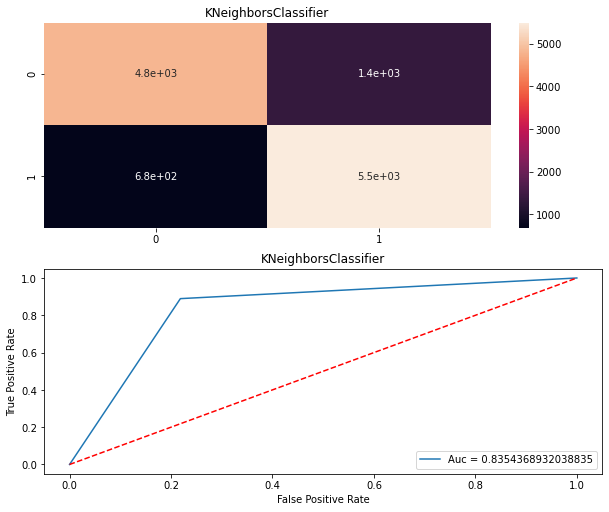

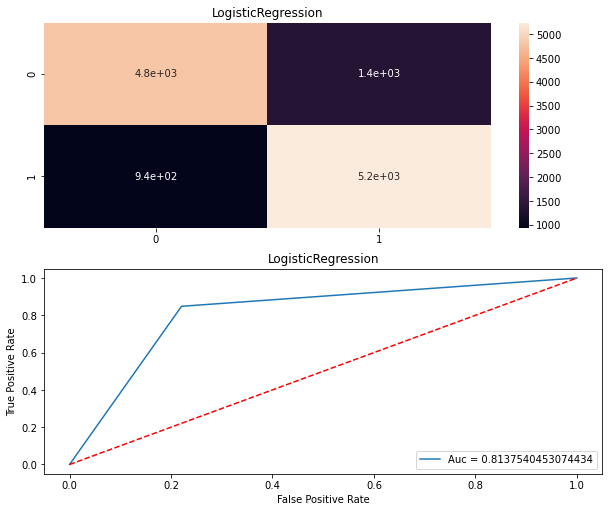

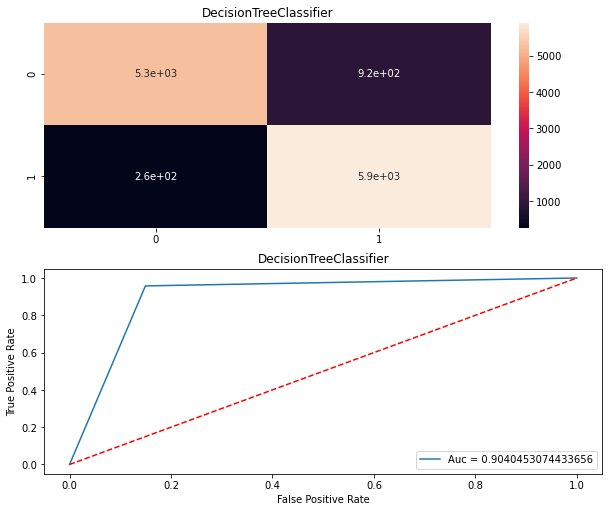

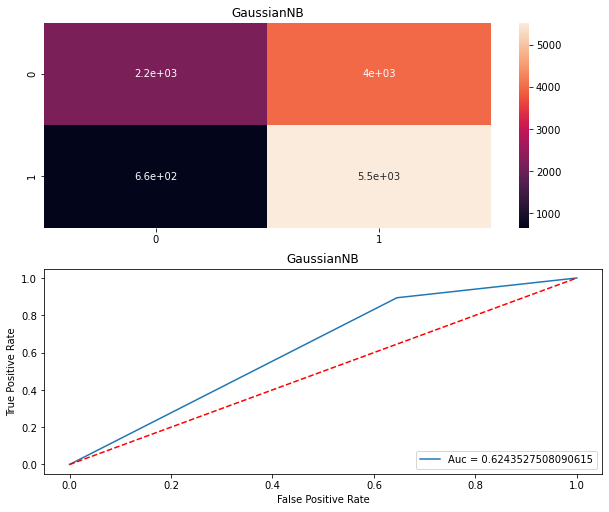

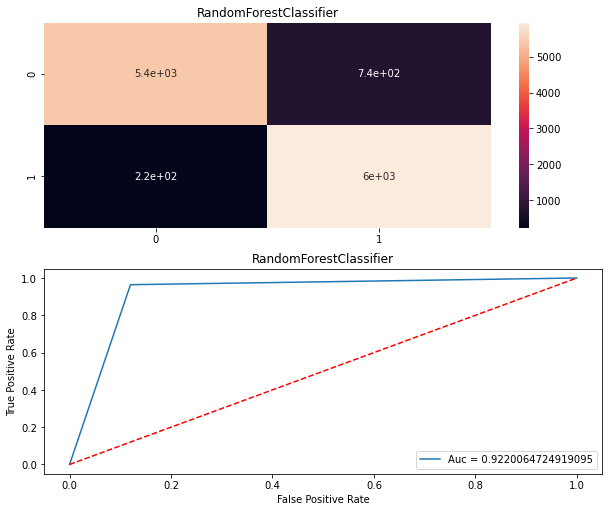

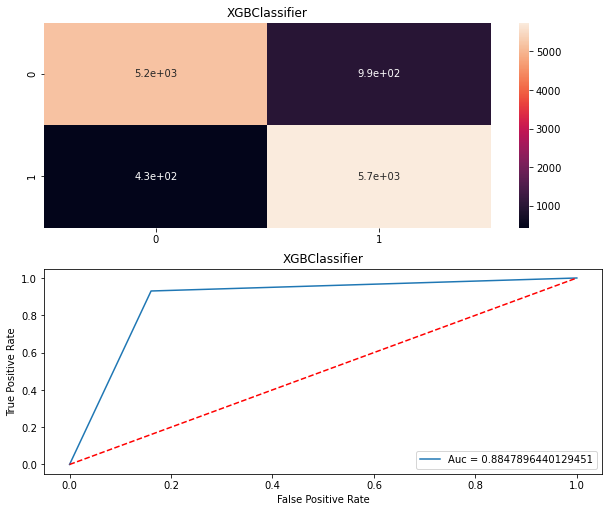

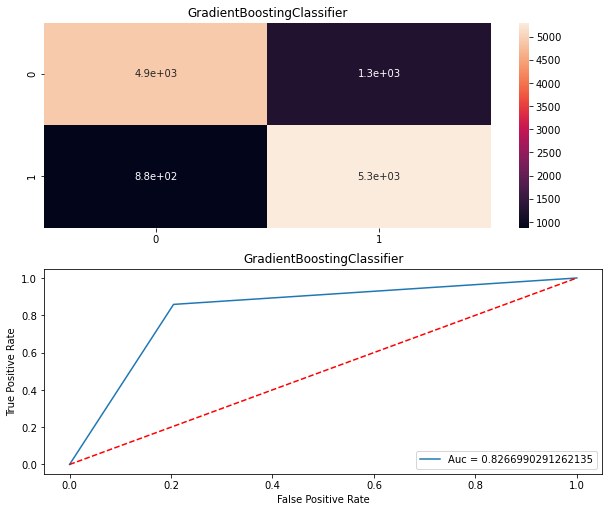

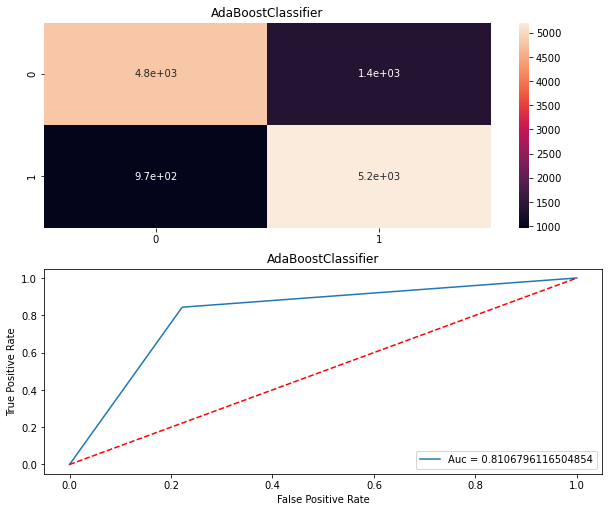

In [42]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [43]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'auc_score':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,auc_score
0,KNeighborsClassifier,83.543689,88.932039,83.955691,83.543689
1,LogisticRegression,81.375405,84.822006,80.883128,81.375405
2,DecisionTreeClassifier,90.404531,95.760518,91.714904,90.404531
3,GaussianNB,62.435275,89.401294,62.081816,62.435275
4,RandomForestClassifier,92.200647,96.407767,93.351295,92.200647
5,XGBClassifier,88.478964,93.025890,88.773841,88.478964
6,GradientBoostingClassifier,82.669903,85.841424,82.206000,82.669903
7,AdaBoostClassifier,81.067961,84.336570,80.614093,81.067961


In [39]:
#We can see from the table RandomForestClassifier is the best performing Algorithms.

#to improve the score we will apply gridsearchcv technique to the top the performing models.

In [40]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [46]:
print('knn',maxaccuracy_score(knn,x,y))
#print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   42   which is   0.8354368932038835
knn 42
max_accuracy_score is at random_state   83   which is   0.815695792880259
lr 83
max_accuracy_score is at random_state   62   which is   0.905663430420712
dt 62
max_accuracy_score is at random_state   83   which is   0.6357605177993527
gnb 83
max_accuracy_score is at random_state   84   which is   0.9247572815533981
rfc 84
max_accuracy_score is at random_state   84   which is   0.8872168284789644
xgb 84
max_accuracy_score is at random_state   56   which is   0.8273462783171521
gbc 56
max_accuracy_score is at random_state   84   which is   0.8132686084142395
ada 84


# GridSearchCV

# model1->XGBClassifier(random_state=84)=88.72%

In [49]:
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,stratify=y)

In [50]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
grid_search=GridSearchCV(xgb,parameters,scoring='recall',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'colsample_bytree': 0.9, 'learning_rate': 1, 'max_depth': 9}

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,stratify=y)
xgb=XGBClassifier(max_depth=9,learning_rate=0.1,colsample_bytree=0.9)
xgb.fit(x,y)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)
print('recall_score=  ',recall_score(y_test,pred_xgb))
print('roc_score='     ,roc_auc_score(y_test,pred_xgb))

Accuracy_score=   0.9472491909385113
recall_score=   0.9825242718446602
roc_score= 0.9472491909385113


In [54]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(max_depth=9,learning_rate=0.1,colsample_bytree=0.9)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8957687544822843


array([[20620,  1054],
       [ 4099, 23665]], dtype=int64)

# model2->DecisionTreeClassifier(random_state=62)=90.56%

In [55]:
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=62,stratify=y)

In [57]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
            
grid_search=GridSearchCV(dt,parameters,scoring='recall',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,stratify=y)
dt=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,max_depth=9)
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
score=accuracy_score(y_test,pred_dt)
print('Accuracy_score=  ',score)
print('recall_score=  ',recall_score(y_test,pred_dt))
print('roc_score='     ,roc_auc_score(y_test,pred_dt))

Accuracy_score=   0.8237864077669903
recall_score=   0.8914239482200648
roc_score= 0.8237864077669903


In [59]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
dt=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,max_depth=9)
cvs=cross_val_score(dt,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(dt,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.901614538424119


array([[18487,  2435],
       [ 6232, 22284]], dtype=int64)

# model3->RandomForestClassifier(random_state=84)=88.72%

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
rfc=RandomForestClassifier()

In [62]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='recall',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,max_depth=10,n_estimators=500)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

Accuracy=   0.8495954692556634
recall_score=   0.918849840255591
roc_score= 0.8486872152097626


In [64]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,max_depth=10,n_estimators=500)
cvs=cross_val_score(rfc,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9260085688826735


array([[19348,  1809],
       [ 5371, 22910]], dtype=int64)

# Saving final RandomForestClassifier model

In [65]:
#From all the model tried above RandomForestClassifier model's has best score for both class 1(0.88),0(0.96)
#cross_val_score is also high.
#hence saving the RandomForestClassifier model.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,max_depth=10,n_estimators=500)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

Accuracy=   0.8478964401294499
recall_score=   0.9170926517571885
roc_score= 0.8469889488294139


In [66]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=1,max_depth=10,n_estimators=500)
rfc.fit(x,y)
cvs=cross_val_score(rfc,x,y,scoring='recall',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9269390223302935


array([[19362,  1813],
       [ 5357, 22906]], dtype=int64)

In [69]:
import joblib
joblib.dump(rfc,'project6-censusriv-1.obj')

['project6-censusriv-1.obj']

In [70]:
model=joblib.load('project6-censusriv-1.obj')

In [71]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['>50K(1),<50K(0)'])
Final_predictions[:5]

,">50K(1),<50K(0)"
0,1
1,0
2,1
3,1
4,0


# Saving final predictions in file.csv format

In [72]:
Final_predictions.to_csv('E:\\final_predictionscensusriv-1.csv',index=False)

# Conclusion:-